# Problem Set 7, due December 3 at 11:59pm

<span style="color:red">WARNING:</span> Some of the problems in this problem set require heavy computation - you are encouraged to start early so that you don't get stuck at the last minute.

# Face Recognition

Your goal for this problem set is to design a basic face recognition system. Since the machine learning force is now strong with you, the prompts for this problem set are deliberately vague. Be creative - but be careful!

One suggestion: Start by implementing this entire problem set on a relatively small subset of all of the images first, before using the full dataset.

## 1. Data Exploration

Download the "[Faces in the Wild](http://vis-www.cs.umass.edu/lfw/)" data set from [this link](http://vis-www.cs.umass.edu/lfw/lfw-funneled.tgz) (roughly 250MB).

### 1.1. Filter out people with few images

Display a histogram that shows the number of images per individual (you may use log-scale if you like). Which individual has the most images? Throw away all people for whom you have fewer than 10 images.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from matplotlib import pyplot as plt

In [3]:
import os
import glob
img_dir = "C:\\Users\\Nithya\\Documents\\Python Scripts\\Images\\lfw_funneled" # Enter Directory of all images 

data_path = os.path.join(img_dir,'*')
files = glob.glob(data_path)
data = []
print(type(files))

<class 'list'>


In [4]:
name = []
img_count = []
for file in files:
    name = name + [file]
    img_count = img_count + [len(os.listdir(file))]   

In [5]:
img_count = np.array(img_count)

Text(0,0.5,'Count of Individuals')

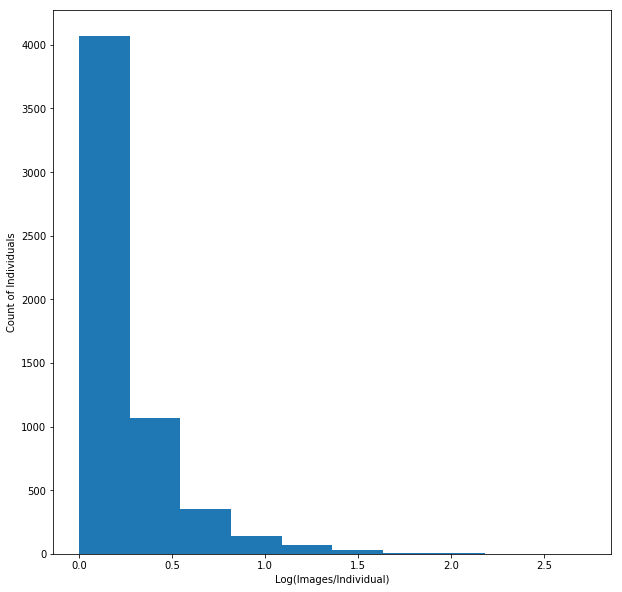

In [6]:
from math import log10
plt.figure(figsize=(10,10))
plt.hist(np.log10(img_count))
#plt.xlim((0,550))
plt.xlabel('Log(Images/Individual)')
plt.ylabel('Count of Individuals')

In [7]:
name = np.array(name)
name = name[np.where(img_count>=10,True,False)]

In [8]:
name[np.argmax(img_count[img_count>=10])]

'C:\\Users\\Nithya\\Documents\\Python Scripts\\Images\\lfw_funneled\\George_W_Bush'

#### George W Bush has the maximum number of images

### 1.2. Show some faces!

1. Pick 8 random images from the dataset and display them in a 2 x 4 grid.
2. Create a single image that shows the "average face" -- i.e., each pixel should display the average value of that pixel across all of the images. 
3. For each pixel, calculate the standard deviation of values for that pixel (you will have a different standard deviation for each of the three color channels, feel free to just show the standard deviation of one of the channels, or to average the standard deviation of the three channels at each pixel). Plot these standard deviations as a heatmap.

What do you notice about the distribution of mean and standard deviation values in these images? (e.g., are they evenly distributed)

In [9]:
from PIL import Image
#loop through the folders to get the images
img_list = []
img_name = []
for person in name:
    for image in os.listdir(person):
        img_name = img_name + [image]
        img_list = img_list + [Image.open(person + '\\' + image)]

In [11]:
len(img_name)

4324

In [12]:
#select 8 random images from all the images
import random
random_8 = random.sample(img_list,8)

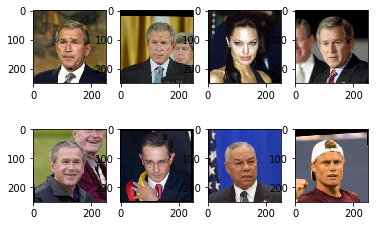

In [13]:
fig,ax = plt.subplots(2,4)
count = 0
for i in [0,1]:
    for j in [0,1,2,3]:
        ax[i,j].imshow(random_8[count])
        count = count + 1

In [14]:
img = []
count = 0
for i in img_list:
    img_i = np.asarray(i, dtype="int32")
    x,y,z = img_i.shape
    img_2d = img_i.reshape(x*y,z)
    img = img + [img_2d]
    count = count + 1
count

4324

In [15]:
img = np.array(img)

In [16]:
img_average = np.zeros((62500,3))
std_red = np.zeros((62500,))

for i in range(0,62500):
    img_average[i][0] = np.average(img[:,i,0])
    img_average[i][1] = np.average(img[:,i,1])
    img_average[i][2] = np.average(img[:,i,2])
    std_red[i] = np.std(img[:,i,0])

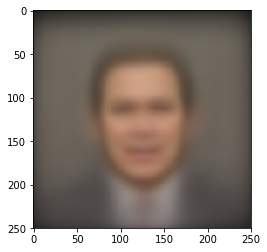

In [17]:
#average image
plt.imshow(img_average.astype(int).reshape(250,250,3))

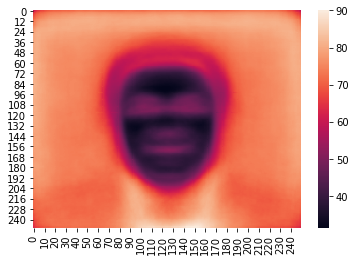

In [18]:
import seaborn as sb
sb.heatmap(std_red.reshape(250,250))

In [ ]:
 # your code here

*Enter your observations here*

The mean face looks very similar to George W Bush, which is expected since he has 530 images. This is way more than any other individual.Its also interesting to note that the average image resembles a man because there are more men than women in the dataset.

As we can see from the heat map the standard deviation around the facial features is less, but it is a lot more for the background pixels. This makes sense as we can see from the random samples we selected that there is a big variation in the backgrounds of all the images. 

## 2. k-Means Clustering


### 2.1. Implementation

Implement the k-Means clustering algorithm that we discuseed in class, using the Euclidean distance function. This will require that you define three new functions:
1. InitializeCentroids(X, k)
2. FindClosestCentroids(X, centroids)
3. ComputeCentroidMeans(X, centroids, k)

*Hint:* You may find  the [`pairwise_distances_argmin`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin.html) function useful.

In [10]:
#get the k centroids
def InitializeCentroids(X,k):
    centroids = X[np.random.choice(range(0,len(X)),k)]
    return centroids

In [11]:
#get closest centroids for all data points
def FindClosestCentroids(X, centroids):
    closest_centroid = pairwise_distances_argmin(X,centroids)
    return closest_centroid

In [12]:
#recompute centroid means for each cluster
def ComputeCentroidMeans(X, centroids, k, idx):
    new_centroid_means = []
    L = len(centroids[0])
    
    #for each centroid
    for i in range(0,k):
        #get the images which are in the cluster
        img_centroid_i = X[idx == i, :]
    
        #create temp variable for the new centroid
        centroid_new = np.zeros(L,)
        
        #calculate the new centroid based on the images in each cluster #len(img_centroid_i[0])
        for j in range(0,L):
            centroid_new[j] = np.average(img_centroid_i[:,j])
        
        #update the centroid
        new_centroid_means = new_centroid_means + [centroid_new]
        
        #print("centroid " + str(i) + " is updated")
    new_centroid_means = np.array(new_centroid_means)
    return new_centroid_means

In [13]:
from sklearn.metrics import pairwise_distances_argmin

def ClusterKM(X, k):
    # Randomly choose clusters
    centroids = InitializeCentroids(X,k)
    
    while True:
        # Assign labels based on closest center
        idx = FindClosestCentroids(X, centroids)
        new_centroids = ComputeCentroidMeans(X, centroids, k, idx)

        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        centroids = new_centroids
    
    return centroids, idx

### 2.2. Sanity check

Apply your k-Means algorithm to a toy dataset to make sure it works properly. 

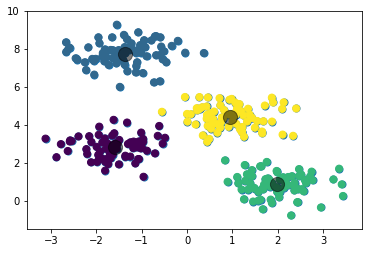

In [15]:
# does everything work as expected?

from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

myCenters, myIdx = ClusterKM(X, 4)

plt.scatter(X[:, 0], X[:, 1], c=myIdx, s=50, cmap='viridis')
plt.scatter(myCenters[:, 0], myCenters[:, 1], c='black', s=200, alpha=0.5);

### 2.3. Image centroids
Apply your k-Means algorithm to the images dataset, using k=20. Make sure to normalize your data first! Show a 20 x 2 grid of images where the first column contains (a) the image that represents the centroid for each of those clusters, and the second column contains (b) the closest image in the original dataset to that centroid. Use Euclidean distance. What do you notice?

*Note:* As you may notice, there are 250*250*3 = 187500 features for each image. If your k-Means algorithm is not implemented efficiently -- an even if it is! -- it might take a long time for your algorithm to converge. If your computer is old, it might even take a very long time for you to simply normalize your data. If you are running into such problems, you may convert your RGB images into greyscale first (using, for instance, the [`rgb2grey`](http://scikit-image.org/docs/dev/api/skimage.color.html#skimage.color.rgb2grey) function).



In [16]:
# Your code here
from skimage.color import rgb2gray
from skimage import data

In [17]:
#flatten all images to a 1D vector 

img = []
count = 0
for i in img_list:
    img_i = np.asarray(i, dtype="int32")
    x,y,z = img_i.shape
    img_2d = img_i.reshape(x*y,z)
    img_1d = img_2d.reshape(x*y*z,)
    img = img + [img_1d]
    count = count + 1

In [18]:
img = np.array(img)
img.shape

(4324, 187500)

In [19]:
#normalize the data
from sklearn.preprocessing import normalize
img_norm = normalize(img)

In [20]:
img_norm.shape

(4324, 187500)

In [21]:
myCenters, myIdx = ClusterKM(img_norm, 20)

In [22]:
myCenters.shape

(20, 187500)

In [23]:
closest_img = pairwise_distances_argmin(myCenters,img_norm)
closest_img

array([2609, 4309, 3062, 2184, 2507, 3917,  787, 2567,  380, 3262,  752,
       4080,   31, 2024,  399, 3831, 4027, 4234, 2604, 3980], dtype=int64)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

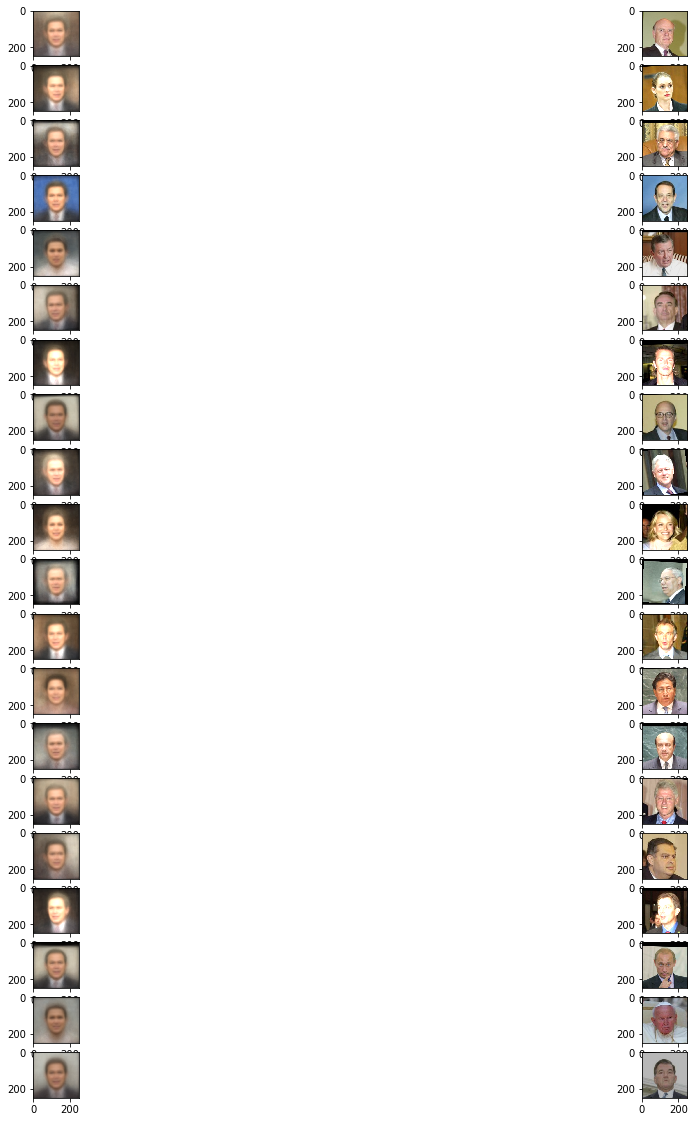

In [26]:
fig,ax = plt.subplots(20,2)
fig.set_size_inches(20,20)


for i in range(0,20):
    ax[i,0].imshow(myCenters[i].reshape(62500,3).reshape(250,250,3)*255)
    ax[i,1].imshow(img_norm[closest_img[i]].reshape(62500,3).reshape(250,250,3)*255)

#### Most centroids resemble males like George W. Bush in terms of their face. Howver there is a variation in the color of their suit/robes/cothes and the background of the image. This is also visible in the closest images to every centroid. The facial features of the person near the centroid is different from the centroid, but the color of the clothes and background in the same. 

### 2.4 Classify yourself

Take a picture of yourself and scale it so that it is in a similar format to the images in the dataset. Show four images:
 1. The image of yourself
 2. The cluster centroid closest to that image
 3. The closest image in the original dataset to that cluster centroid
 4. The closest image in the original dataset to the image of yourself


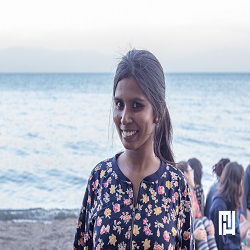

In [117]:
# My image
Image.open('Nithya.jpg')

In [133]:
my_image = np.array(Image.open('Nithya.jpg'))
my_image = my_image.reshape(62500,3).reshape(187500)/255
closest_cent = pairwise_distances_argmin([my_image],myCenters*255)

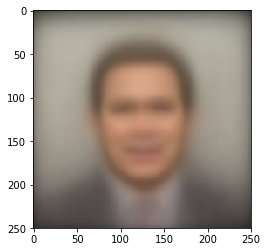

In [134]:
#closest centroid
plt.imshow(myCenters[closest_cent].reshape(250,250,3)*255)

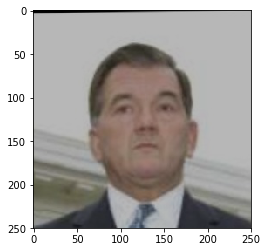

In [142]:
#closest image to centroid
closest_img_to_centroid = pairwise_distances_argmin(myCenters[closest_cent],img_norm)

#image closest to centroid: 
plt.imshow(img_norm[closest_img_to_centroid].reshape(250,250,3)*255)

([], <a list of 0 Text yticklabel objects>)

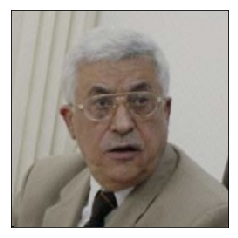

In [147]:
#image closest to me
closest_img_to_me = pairwise_distances_argmin([my_image],img_norm)

#image closest to me: 
plt.imshow(img_norm[closest_img_to_me].reshape(250,250,3)*255)
plt.xticks(())
plt.yticks(())

## 3. PCA and Eigenfaces 

Begin by normalizing your data. Then, set aside 50% of the images as "test" data and using the remaining images as "training" data.


### 3.1. How many components?

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn on the training dataset. Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 100. How many components are required to explain 75% of the variation in your original data?

In [217]:
#flatten all images to a 1D vector 

img = []
count = 0
for i in img_list:
    img_i = np.asarray(i, dtype="int32")
    img_i = rgb2gray(img_i)
    x,y = img_i.shape
    img_1d = img_i.reshape(x*y,)
    #img_1d = img_2d.reshape(x*y*z,)
    img = img + [img_1d]
    count = count + 1

In [220]:
img = np.array(img)

In [222]:
img_norm = normalize(img)

In [234]:
X_train.shape

(2162, 62500)

In [251]:
from sklearn.decomposition import PCA

# Enter your code here

X = img_norm
X_train,X_test = train_test_split(X, test_size = 0.5)

pca = PCA(n_components= 100)
pca.fit(X_train)
#pca.explained_variance_ratio_

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Text(0,0.5,'% of variation')

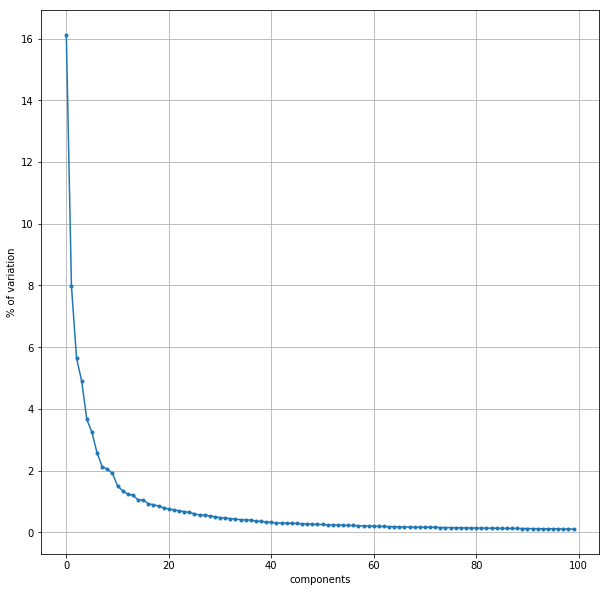

In [252]:
plt.figure(figsize=(10,10))
plt.grid()
plt.plot(pca.explained_variance_ratio_*100 , marker = '.')
plt.xlabel('components')
plt.ylabel('% of variation')

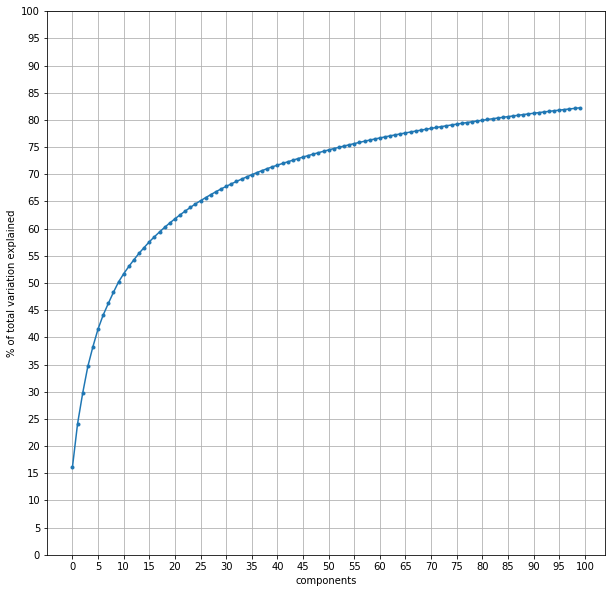

In [253]:
total_variance_explained = []

for i in range(0,len(pca.explained_variance_ratio_)):
    total_variance_explained = total_variance_explained + [np.sum(pca.explained_variance_ratio_[0:i+1])]


total_variance_explained = np.array(total_variance_explained)
plt.figure(figsize=(10,10))
plt.plot(total_variance_explained*100 , marker = '.')
plt.xlabel('components')
plt.ylabel('% of total variation explained')
plt.xticks(range(0,105,5))
plt.yticks(range(0,105,5))
plt.grid()

50 components are required to explain 75% of the variation in data.

### 3.2. Eigenfaces

Extract the 10 first principal components (the "eigenfaces") and display them below.

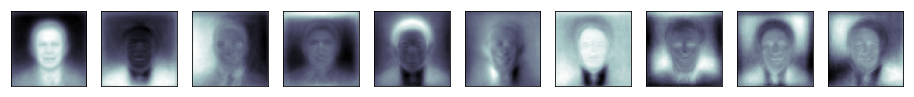

In [260]:
# Enter your code here
fig = plt.figure(figsize=(16, 6))
for i in range(10):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(250,250),
              cmap=plt.cm.bone)

### 3.3. Projections, clustering and PCA
 - Project all of the training and test data into the 50-dimensional space defined by the first 50 principal components.
 - Apply k-means clustering, with k=20, to the 50-dimensional projections of the training data. 
 - Display a 4 x 5 grid of images that shows what each of the 20 centroids look like after the centroid is projected back into the original-image space.

In [255]:
# projecting the train and test data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

print(X_train_pca.shape)
print(X_test_pca.shape)

(2162, 100)
(2162, 100)


In [292]:
#applying k means
myCenters, myIdx = ClusterKM(X_train_pca, 20)

In [312]:
reconstructed_img = pca.inverse_transform(myCenters) #np.dot(myCenters,pca.components_)*255

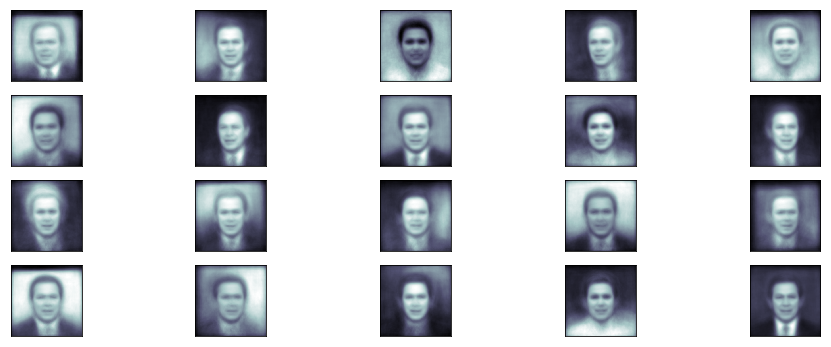

In [313]:
# reconstructed centroids
fig = plt.figure(figsize=(16, 6))
for i in range(20):
    ax = fig.add_subplot(4, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(reconstructed_img[i].reshape(250,250),
              cmap=plt.cm.bone)

In [274]:
reconstructed_img = np.dot(X_test_pca,pca.components_)

### 3.4. Recognition

Create a test set of 10 images using (i) 8 images randomly selected from the test data, (ii)  any other non-face image you can find that has the right dimensions, and (iii) an image of yourself. Create a 10 x 5 grid of images, with one row for each of these images, and 5 columns that contain: 
1. The original image. 
2. The reconstruction of that image after it is projected onto the 50-dimensional eigenface-space and then re-projected back into the original image space. 
3. Find the nearest centroid (from 3.3) to the image, and show the reconstruction of that nearest centroid. 
4. Find the image in the training data whose 50-dimensional representation is closest to that centroid, and show the reconstruction of that image.
5. Show the original training image that was selected in above (step 4 in this list)

In [398]:
#randomly sampled 8 test images
np.random.seed(32)
test_img = X_test[np.random.choice(range(0,len(X_test)),8)]

#my image
my_image = Image.open('Nithya.jpg')
my_image = rgb2gray(np.array(my_image)).reshape(62500,)/255

#puppy image
puppy_img = Image.open('puppy.jpg')
puppy_img = rgb2gray(np.array(puppy_img)).reshape(62500,)/255

#test image
test_img = np.append(test_img, [my_image], axis = 0)
test_img =np.append(test_img, [puppy_img], axis = 0)

In [391]:
my_image

array([0.00389081, 0.00389081, 0.00389081, ..., 0.00312006, 0.00315741,
       0.00296846])

In [396]:
#reconstructed image
projected_test_img = pca.transform(test_img)
reconstructed_test_img = pca.inverse_transform(projected_test_img)

In [404]:
#closest centroid to each test image
centroid_test_img = myCenters[pairwise_distances_argmin(projected_test_img, myCenters)]
reconstructed_closest_centroid = pca.inverse_transform(centroid_test_img)

In [409]:
#closest training image to each centroid
closest_train_img = X_train_pca[pairwise_distances_argmin(centroid_test_img,X_train_pca)]
reconstructed_closest_train_img = pca.inverse_transform(closest_train_img)

In [411]:
#original closest training image
original_train_img = X_train[pairwise_distances_argmin(centroid_test_img,X_train_pca)]

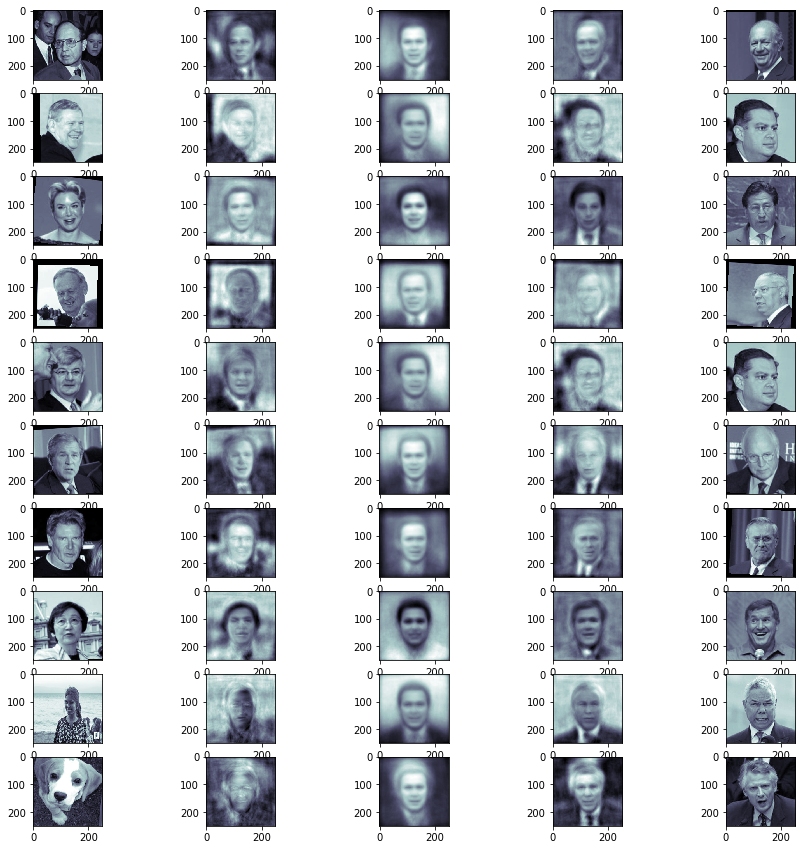

In [440]:
fig,ax = plt.subplots(10,5)
fig.set_size_inches(15,15)

for i in range(10):
    ax[i,0].imshow(test_img[i].reshape(250,250),cmap=plt.cm.bone)
    ax[i,1].imshow(reconstructed_test_img[i].reshape(250,250),cmap=plt.cm.bone)
    ax[i,2].imshow(reconstructed_closest_centroid[i].reshape(250,250),cmap=plt.cm.bone)
    ax[i,3].imshow(reconstructed_closest_train_img[i].reshape(250,250),cmap=plt.cm.bone)
    ax[i,4].imshow(original_train_img[i].reshape(250,250),cmap=plt.cm.bone)

### 3.5. (Extra credit) Share your results
Post the following to bCourses for people in the class to see:
 - The photo of yourself
 - The cluster centroid from 2.4 that is closest to that image
 - The closest image in the dataset to that cluster centroid
 - The reconstruction of your image after it has been projected and reprojected (i.e., #2 in 3.4)
 - The nearest centroid to the projection (i.e., #3 in 3.4)
 - The closest training image to that centroid (i.e., #5 in 3.4)

### 3.6. (Extra extra credit) PCA Implementation

Implement PCA yourself, without using sklearn. How does the running time of your algorithm compare to the running time of the sklearn version?

In [5]:
# Enter your code here

### 3.6. (Extra extra extra credit): Deep Learning
- Download the latest checkpoint of the pre-trained Inception model from TensorFlow
- Using the pretrained ConvNet, extract features for all of these images
- Redo parts 2.3 (b) and 2.4 (parts 1,3,4) of this problem set using the ConvNet features instead of the raw pixel values
- How do these results compare to the results in parts 2.3 and 2.4? Interpret!

*Your observations here*